<a href="https://colab.research.google.com/github/FaizanHameed1/Immage-Classification-with-ImageNet-dataset-using-Transfer-Learningg/blob/main/ImageNet_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Check the present working directory
import os
os.getcwd()

'/content'

In [ ]:
#cd /content/gdrive/My Drive/Kaggle/ImageNet

ImageNet orignal dataset have more than 14 million images having resolution 224x224. A great amount of computing power(CPU,GPU,RAM) is required for processing of dataset of this size. So, to overcome this problem we are using  Fast.ai’s Imagenette dataset.

In [ ]:
#downloading the ImmageNet dataset
#!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz

In [ ]:
#Extracting
#!tar -xf imagenette2.tgz

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
from tensorflow import keras
from keras.models import Sequential

from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D, Convolution2D
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.core import Dropout,Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation

In [ ]:
cd /content/gdrive/My Drive/Kaggle/ImageNet/imagenette2

/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2


In [ ]:
#direction of our train and test dataset
train_direct = '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/'
test_direct = '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/val/'

In [ ]:
os.listdir(train_direct)#folders in train dataset

['n02979186',
 'n03000684',
 'n02102040',
 'n01440764',
 'n03888257',
 'n03028079',
 'n03394916',
 'n03417042',
 'n03425413',
 'n03445777']

In [ ]:
os.listdir(test_direct)

['n01440764',
 'n03000684',
 'n02102040',
 'n02979186',
 'n03028079',
 'n03417042',
 'n03394916',
 'n03888257',
 'n03425413',
 'n03445777']

We will map it when required.

In [ ]:
#we can made a function for upper two cells code plus some extra features

def immages_in_class(path_dir):
  immage_directory=[]#Making the directory of every folder in test set(We may or may not require in future)
  class_dict={}#Dict to save the number of immages in each class in test set
  immages_class_dict={}#dictionary of immages files in different classis
  #folder_directory=[]
  count=0
  for folder in os.listdir(path_dir):
    fold_direct=path_dir + folder
    #folder_directory.append(fold_direct)
    class_dict[folder]=len(os.listdir(fold_direct))
    immages=[]
    for immage in os.listdir(fold_direct):
      count+=1
      image_direct=fold_direct+"/"+immage
      immage_directory.append(image_direct)
      immages.append(immage)
    immages_class_dict[folder]=immages

  return class_dict,immages_class_dict,immage_directory,count


In [ ]:
train_classes,train_immage_classis,train_immages_directory,train_immage_count= immages_in_class(train_direct)
test_classes,test_immage_classis,test_immages_directory,test_immage_count= immages_in_class(test_direct)
#classis and no of immages in each class
print(f'No of immages in each class in train set: {train_classes}')
print(f'No of immages in each class in test set: {test_classes}')

No of immages in each class in train set: {'n02979186': 993, 'n03000684': 858, 'n02102040': 955, 'n01440764': 963, 'n03888257': 960, 'n03028079': 941, 'n03394916': 956, 'n03417042': 961, 'n03425413': 931, 'n03445777': 951}
No of immages in each class in test set: {'n01440764': 387, 'n03000684': 386, 'n02102040': 395, 'n02979186': 357, 'n03028079': 409, 'n03417042': 389, 'n03394916': 394, 'n03888257': 390, 'n03425413': 419, 'n03445777': 399}


In [ ]:
#Immages in different classis
print(f'immages in different classis of train set: {train_immage_classis}')
print(f'immages in different classis of test set: {test_immage_classis}')

immages in different classis of train set: {'n02979186': ['n02979186_2717.JPEG', 'n02979186_553.JPEG', 'n02979186_19433.JPEG', 'n02979186_8089.JPEG', 'n02979186_15409.JPEG', 'n02979186_8449.JPEG', 'n02979186_27619.JPEG', 'n02979186_15154.JPEG', 'n02979186_19604.JPEG', 'n02979186_16559.JPEG', 'n02979186_2429.JPEG', 'n02979186_1397.JPEG', 'n02979186_2548.JPEG', 'n02979186_4704.JPEG', 'n02979186_10956.JPEG', 'n02979186_12077.JPEG', 'n02979186_23827.JPEG', 'n02979186_19036.JPEG', 'n02979186_13513.JPEG', 'n02979186_19337.JPEG', 'n02979186_15694.JPEG', 'n02979186_20355.JPEG', 'n02979186_14136.JPEG', 'n02979186_9758.JPEG', 'n02979186_9437.JPEG', 'n02979186_11883.JPEG', 'n02979186_10523.JPEG', 'n02979186_16967.JPEG', 'n02979186_5353.JPEG', 'n02979186_10756.JPEG', 'n02979186_20108.JPEG', 'n02979186_16585.JPEG', 'n02979186_25384.JPEG', 'n02979186_10805.JPEG', 'n02979186_906.JPEG', 'n02979186_16437.JPEG', 'n02979186_495.JPEG', 'n02979186_22659.JPEG', 'n02979186_14237.JPEG', 'n02979186_8816.JPEG',

In [ ]:
#Immages directory(may or may not be used)
print(f'list of train set immage directory : {train_immages_directory}')
print(f'list of test set immage directory: {test_immages_directory}')

list of train set immage directory : ['/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_2717.JPEG', '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_553.JPEG', '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_19433.JPEG', '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_8089.JPEG', '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_15409.JPEG', '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_8449.JPEG', '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_27619.JPEG', '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_15154.JPEG', '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_19604.JPEG', '/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_16559.JPEG', '/content/gdrive/My Drive/Kaggle/Imag

In [ ]:
#Total number of immages in training and test set
print(f'number of immages in training set: {train_immage_count}')
print(f'number of immages in test set: {test_immage_count}')

number of immages in training set: 9469
number of immages in test set: 3925


In [ ]:
train_immages_directory[1]

'/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/n02979186/n02979186_553.JPEG'

In [ ]:
#checking the shape of immages
#one_img = cv2.imread(train_immages_directory[22])
#one_img.shape

In [ ]:
#classis/emotions in test set
test_immage_classis.keys()

dict_keys(['n01440764', 'n03000684', 'n02102040', 'n02979186', 'n03028079', 'n03417042', 'n03394916', 'n03888257', 'n03425413', 'n03445777'])

In [ ]:
#classis/emotions in training set
train_immage_classis.keys()

dict_keys(['n02979186', 'n03000684', 'n02102040', 'n01440764', 'n03888257', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777'])

In [ ]:
#total classis in train set
print(f'totla number of classis in train set: {len(train_immage_classis.keys())}')

totla number of classis in train set: 10


In [ ]:
#total classis in test set
print(f'totla number of classis in test set: {len(test_immage_classis.keys())}')

totla number of classis in test set: 10


In [ ]:
#train_classes.values()

In [ ]:
#test_classes.values()

In [ ]:
#Plotting some of immages in training dataset
def plot_immage(start,end,immage_place):
  #j=1
  for x in train_immages_directory[start:end]:
    
    # reading image from directory
    image = cv2.imread(x)
    
    #plt.subplot(1,5,j)
    # calling imshow() using plt object
    plt.imshow(image)
    # displaying the image
    plt.show()
    #j+=1

_________Some of immages in training data____________


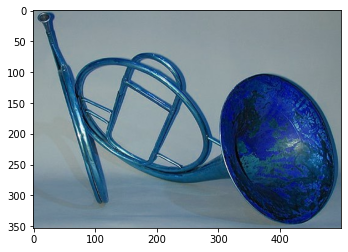

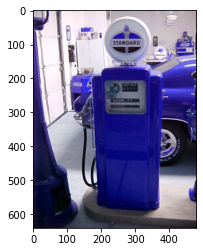

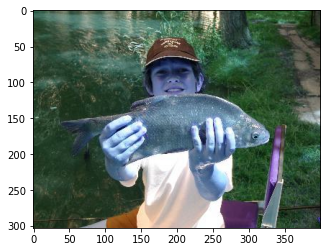

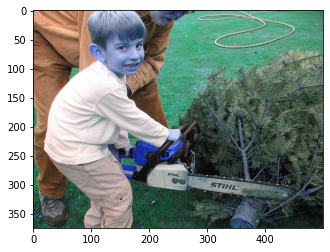

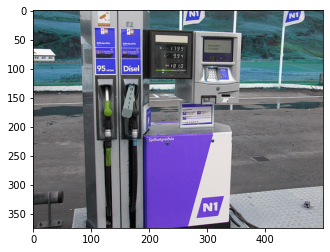


_________Some of immages in test data____________


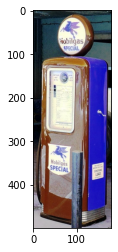

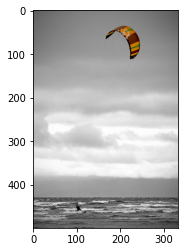

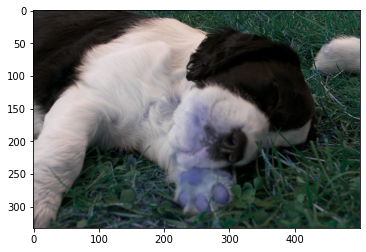

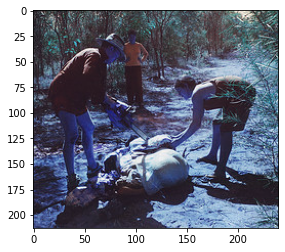

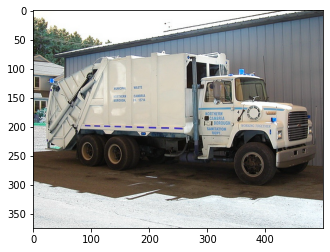

In [ ]:
#first we randomly shuffle lists so that we can plot the immage randomly
train_list=random.shuffle(train_immages_directory)
test_list=random.shuffle(test_immages_directory)
print("_________Some of immages in training data____________")
plot_training=plot_immage(10,15,train_list)# plotting some immages in training set
print("")
print("_________Some of immages in test data____________")
plot_test=plot_immage(100,105,test_list)# plotting some immage sin test set

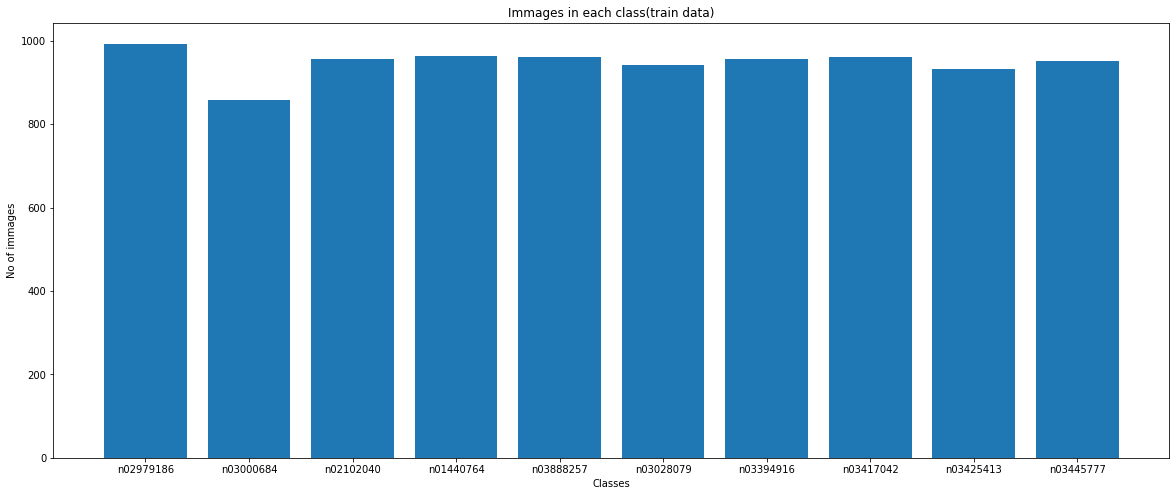

In [ ]:
#Immages in every class(training data)
plt.figure(figsize=(20,8))
plt.bar(train_classes.keys(),train_classes.values())
plt.xlabel("Classes")
plt.ylabel('No of immages')
plt.title("Immages in each class(train data)")
plt.show()

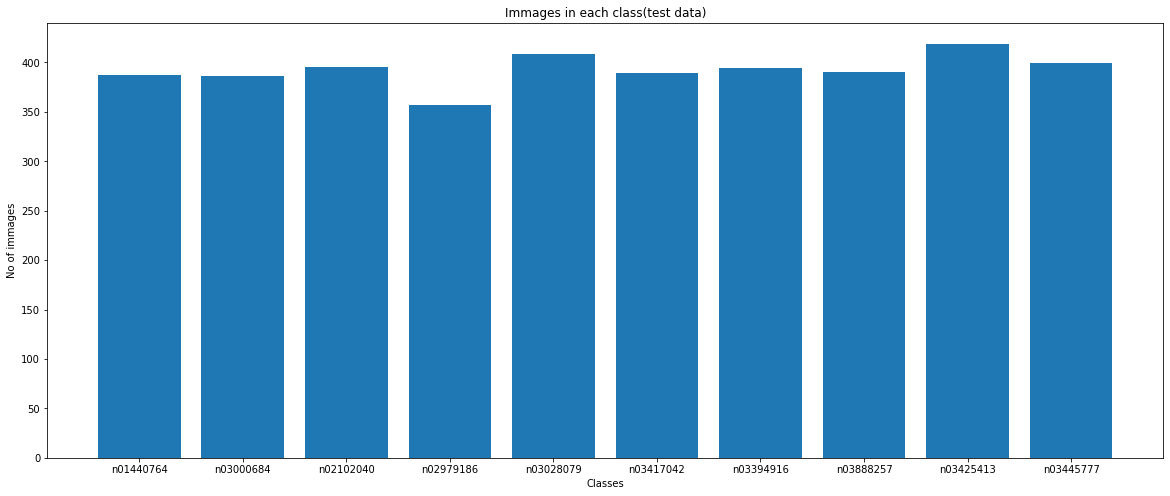

In [ ]:
#Immages in every class(test data)
plt.figure(figsize=(20,8))
plt.bar(test_classes.keys(),test_classes.values())
plt.xlabel("Classes")
plt.ylabel('No of immages')
plt.title("Immages in each class(test data)")
plt.show()

We can see that our data is balanced. 

In [ ]:
#ImageDataGenerator accepts an input batch of images, randomly transforms the batch, and then returns randomly transformed data(without returning the orignal data).
#ImageDataGenerator augment the immage in real time while our model is still training.

In [ ]:
#To Generalize model we are going to use Data Augmentation
#using .flow_from_directory(directory)
#Check https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator for further info (Also check how to use if using .flow(x, y)  )

# create a new generator
datagen = ImageDataGenerator()
# loading training data from directory
train = datagen.flow_from_directory("/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/train/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224)) #we can write train_direct variable (define for training set directory) on the place of directory
# loading  validation data
test = datagen.flow_from_directory("/content/gdrive/My Drive/Kaggle/ImageNet/imagenette2/val/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224)) #we can write test_direct variable (define for test set directory) on the place of directory

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [ ]:
#Checking the given seven classes
classes=train.class_indices #we definr a variable classes because we will reverse labels after prediction
print(classes)

{'n01440764': 0, 'n02102040': 1, 'n02979186': 2, 'n03000684': 3, 'n03028079': 4, 'n03394916': 5, 'n03417042': 6, 'n03425413': 7, 'n03445777': 8, 'n03888257': 9}


In [ ]:
classes.items()

dict_items([('n01440764', 0), ('n02102040', 1), ('n02979186', 2), ('n03000684', 3), ('n03028079', 4), ('n03394916', 5), ('n03417042', 6), ('n03425413', 7), ('n03445777', 8), ('n03888257', 9)])

In [ ]:
#for x,y in classes.items():
#  print(x)

In [ ]:
#for x,y in classes.items():
#  print(y)

In the train and val folder there are different classis folder so first of all we have to map these classes with proper name.

In [ ]:
#accessing each folder in train data
for folder in os.listdir(train_direct):
  print(folder)

n02979186
n03000684
n02102040
n01440764
n03888257
n03028079
n03394916
n03417042
n03425413
n03445777


In [ ]:
#imagenette_map = { 
#    "n01440764" : "tench",
#    "n02102040" : "springer",
#    "n02979186" : "casette_player",
#    "n03000684" : "chain_saw",
#    "n03028079" : "church",
#    "n03394916" : "French_horn",
#    "n03417042" : "garbage_truck",
#    "n03425413" : "gas_pump",
#    "n03445777" : "golf_ball",
#    "n03888257" : "parachute"
#}

In [ ]:
inverted_classes = dict(map(reversed, classes.items()))
print(inverted_classes)

{0: 'n01440764', 1: 'n02102040', 2: 'n02979186', 3: 'n03000684', 4: 'n03028079', 5: 'n03394916', 6: 'n03417042', 7: 'n03425413', 8: 'n03445777', 9: 'n03888257'}


In [ ]:
#mapping the labels with proper  names

assign_classes={0: "tench", 1: "springer", 2: "casette_player", 3: "chain_saw", 4: "church", 5: "French_horn", 6: "garbage_truck", 7: "gas_pump", 8: "golf_ball", 9: "parachute"}

In [ ]:
#test.class_indices

In [ ]:
train.labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

Loading the pre-trained weights of VGG16 CNN architecture. It has total sixteen layers with thirteen convolutional layers.Which method we have to use depends on our dataset requirements. For further details we can see this article as some graphs in this article is much helpful in understanding transfer learning
https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751

Two ways of transfer learning are.

i) Fine tuning: In this proceedure we fine tune the pre-trained model. We keep already learnt weights as initial parameters.

ii) Feature Extraction: We extract features from pre-trained model and then training a classifier on top of it.


In [ ]:
from tensorflow.keras.applications import VGG16
#we will mention "include_top=False" to remove the last three fully connected layers(including softmax layer). We have only ten classes in our model
model_pretrained = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))#it retained the weights of 'imagenet' data. we put weights= None than it will forget all learnt features and weights will initialize randomly

# mark loaded(pretrained model(VGG16)) layers as not trainable(to retain weights)
for layer in model_pretrained.layers:
	layer.trainable = False

model_pretrained.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
train.labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
test.labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
#Encoding the labels
from tensorflow.keras.utils import to_categorical
targets_train = to_categorical(train.labels)
targets_test = to_categorical(test.labels)
print(targets_train[1])
print(targets_test[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#We are adding some layers at the end of model(we have removed flattening layer and onward from orignal model)
from keras import layers
# Flatten layer
l = layers.Flatten()(model_pretrained.output)

# fully connected layer
l = layers.Dense(256, activation='relu')(l)
l = layers.Dropout(0.4)(l)
l = layers.BatchNormalization()(l)

#Dense layer 
l = layers.Dense(128, activation='relu')(l)
l = layers.Dropout(0.5)(l)


# softmax layer with ten classis
l = keras.layers.Dense(10, activation='softmax')(l)


# creating final model
final_model = keras.models.Model(inputs=model_pretrained.input, outputs=l)

In [ ]:
# compiling model
final_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.callbacks import EarlyStopping
#To avoid overfitting early stopping is used
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)
callbacks=[earlystop]


In [ ]:
steps_per_epoch = train.n // train.batch_size #If we have a training set of the fixed size you can ignore it.It is useful if we have a huge data set or 
#if we are generating random data augmentations on the fly, i.e. infinite size. steps_per_epoch is batches of samples to train.
test_steps = test.n // test.batch_size #If we have a test dataset fixed size you can ignore it
print(f"steps per epoch: {steps_per_epoch}")
print(f"test steps: {test_steps}")

steps per epoch: 73
test steps: 30


In [ ]:
#We have to train it for minimum 30 epochs but due to interner connection problem for demonstration i am training for only five epochs.
history = final_model.fit(train,
                            batch_size=128,
                            epochs=5,
                            validation_data=test,
                            steps_per_epoch=steps_per_epoch,
                            validation_steps=test_steps,
                            callbacks=callbacks,
                            verbose=1)

Epoch 1/5
73/73 [==============================] - 6865s 94s/step - loss: 2.9392 - accuracy: 0.1280 - val_loss: 1.5323 - val_accuracy: 0.5430
Epoch 2/5
27/73 [==========>...................] - ETA: 50:49 - loss: 2.3893 - accuracy: 0.2050

Due to internet disconnection problem training process cannot be carried on further. It require much time to train. So, i am stopping the training process here.

In [ ]:
#saving model
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [ ]:
#Reloading the model

#loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test)
train_loss, train_accuracy = model.evaluate(train)
print(f'model test loss:{test_loss}')
print(f'model test accuracy:{test_accuracy}')
print(f'model train loss:{train_loss}')
print(f'model train accuracy:{train_accuracy}')